# Dummy data
**Goal**: Create dummy data to test the estimator on

In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
from sklego.loess import LoessSmoother, random_x, generate_noisy_sine_data, plot_windows
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [186]:
np.random.seed(0)
noise_std=2
x, y = generate_noisy_sine_data(noise_std)
model = LinearRegression()

smoother = LoessSmoother(model=None,
                         n_degree=2,
                         transform=False,
                         window_method='fixed',
                         window_size=15,
                         step_size=.2,
                         fraction=.1)

smoother.fit(x,y)


# plot_windows(x,y, smoother.x_focal_base, smoother.y_focal_base, smoother.indices)


# Full plot

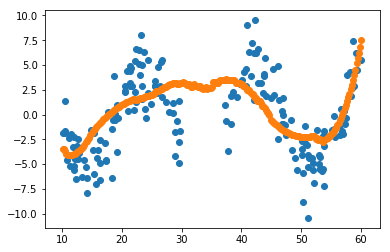

In [187]:
plt.scatter(x,y)
plt.scatter(smoother.x_focal_base, smoother.y_focal_base[1:])

# Tomi's code

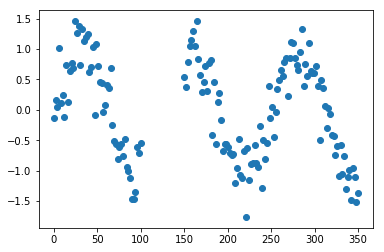

In [171]:
x1 = np.linspace(0, 100, 50)
x2 = np.linspace(150, 350, 100)
x = np.append(x1,x2)
# x = np.random.normal(loc=-100, scale=10, size=100) + np.random.normal(loc=100, scale=10, size=100)
y = np.sin(x/20) + np.random.normal(0, 0.3, size=x.shape)

plt.scatter(x,y)

In [168]:
estimator1 = LoessSmoother(model=None,
                         n_degree=1,
                         transform=True,
                         window_method='knn_symmetric',
                         window_size=20,
                         step_size=.2,
                         fraction=.4)
# y_new1 = estimator1.fit(x, y).transform(x)

# estimator2 = LoessSmoother(point_extraction='symmetric', p_degree=3, frac=0.4)
# y_new2 = estimator2.fit(x, y).transform(x)

# estimator3 = LoessSmoother(point_extraction='knn', p_degree=1, frac=0.4)
# y_new3 = estimator3.fit(x, y).transform(x)

# estimator4 = LoessSmoother(point_extraction='knn', p_degree=3, frac=0.4)
# y_new4 = estimator4.fit(x, y).transform(x)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(x, y)

xs = np.linspace(-20, 120)
ax.plot(x, y_new1, '--', label='symmetric linear') 
ax.plot(x, y_new2, '--', label='symmetric poly3') 
ax.plot(x, y_new3, '--', label='knn linear') 
ax.plot(x, y_new4, '--', label='knn poly 3') 

plt.legend()